In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import re

from autograd import grad
from pymanopt.manifolds import Oblique
from pymanopt.solvers import SteepestDescent
from contextlib import redirect_stdout
from oblique import *

# Oblique Manifold

If a cost function is a strict-saddle one, I think Riemannian gradient descent (RGD) + noise can escape strict saddles. I'll try RGD with / without noise. 

Add noise:
$$ 
\mathbf x^+ = \text{R}_{\mathbf x}(\mathbf x + \mathbf n) 
$$

It seems noise is not necessary as in Prof.'s lecture on hybrid GD.

In [3]:
# dir(Oblique)

In [4]:
grad_sine = grad(np.sin)
grad_sine(np.pi)

-1.0

## Objective 1 of "Neural Collapse with CE Loss"

In [5]:
M, N = 10, 5
solver = SteepestDescent()
manifold = Oblique(M, N)
prob = Problem(manifold=manifold, cost=lr_cost)
Xopt = solver.solve(prob)
# Xopt

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+4.5200540909015512e+00	1.19436591e+00
    2	+3.8620222498421648e+00	2.61662903e-01
    3	+3.8460785236028183e+00	2.13500107e-01
    4	+3.8271760069075689e+00	1.49362249e-01
    5	+3.8185067475145296e+00	2.71447881e-02
    6	+3.8181922774320247e+00	1.78316082e-02
    7	+3.8180851869193395e+00	5.71379965e-03
    8	+3.8180730486742229e+00	5.56622965e-04
    9	+3.8180729704393057e+00	3.43708072e-04
   10	+3.8180729519541483e+00	2.63378385e-04
   11	+3.8180729306185199e+00	1.11400095e-04
   12	+3.8180729260715709e+00	1.64425239e-05
   13	+3.8180729259867343e+00	6.62994962e-06
   14	+3.8180729259716362e+00	1.91135613e-06
   15	+3.8180729259704638e+00	7.24913123e-07
Terminated - min grad norm reached after 15 iterations, 0.09 seconds.



In [6]:
check_etf(Xopt)

ETF Tests passed!


## Objective 2

In [7]:
M, N = 10, 6
solver = SteepestDescent()
manifold = Oblique(M, N)
prob = Problem(manifold=manifold, cost=lr_cost_weights)
Xopt = solver.solve(prob)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+5.9983565779104318e+00	5.50156528e+00
    2	+2.9098053750677684e+00	1.98704537e+00
    3	+2.5387856013652241e+00	2.46799930e+00
    4	+1.6223076786434028e+00	8.81942087e-01
    5	+1.4328884583703314e+00	5.25143663e-01
    6	+1.4213457801942710e+00	5.07610079e-01
    7	+1.3821264060787404e+00	3.57749990e-01
    8	+1.3678833328395152e+00	3.12033694e-01
    9	+1.3399310832908908e+00	6.07877327e-02
   10	+1.3392044962366774e+00	4.04560954e-02
   11	+1.3390130141134580e+00	3.04920087e-02
   12	+1.3388796219341645e+00	1.99057061e-02
   13	+1.3387931942921347e+00	7.00906595e-03
   14	+1.3387881464294242e+00	5.37202242e-03
   15	+1.3387821398730422e+00	2.17598092e-03
   16	+1.3387810492759200e+00	5.95721484e-04
   17	+1.3387809869325040e+00	3.23371910e-04
   18	+1.3387809619067359e+00	6.38170318e-05
   19	+1.3387809611894506e+00	3.46170378e-05
   20	+1.3387809609030181e+00	7.01653709e-06


In [8]:
check_etf(Xopt[:, :N // 2], verbose=True)

[1. 1. 1.]
[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]
ETF Tests passed!


In [9]:
check_etf(Xopt[:, N // 2:], verbose=True)

[1. 1. 1.]
[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]
ETF Tests passed!


## Weight Decay

In [10]:
num_cls = 10
N = 3
np.kron(np.arange(num_cls), np.ones((N,)))

array([0., 0., 0., 1., 1., 1., 2., 2., 2., 3., 3., 3., 4., 4., 4., 5., 5.,
       5., 6., 6., 6., 7., 7., 7., 8., 8., 8., 9., 9., 9.])

In [11]:
num_cls = 10
sample_per_cls = 10
N = sample_per_cls * num_cls
M = 15
solver = SteepestDescent()
manifold = Product((Oblique(M, num_cls), Oblique(M, N), Euclidean(num_cls)))
prob = Problem(manifold=manifold, cost=make_lr_weight_decay())
Xopt = solver.solve(prob)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+2.0748006601401077e+01	1.23963588e+00
    2	+1.9712212216170276e+01	8.36627741e-01
    3	+1.8840500639149411e+01	2.08614316e-01
    4	+1.8755658561772215e+01	2.05465427e-01
    5	+1.8674890874588325e+01	1.56888198e-01
    6	+1.8605020752053381e+01	1.99310494e-01
    7	+1.8603287295283309e+01	3.08188852e-01
    8	+1.8596436963979386e+01	3.00774342e-01
    9	+1.8570402747710688e+01	2.70916967e-01
   10	+1.8490373234542133e+01	1.52586608e-01
   11	+1.8461696170713715e+01	2.27127165e-01
   12	+1.8392072396235353e+01	8.99578327e-02
   13	+1.8246494989731509e+01	2.25893026e-01
   14	+1.8173134976235470e+01	7.48347070e-02
   15	+1.8142004324339176e+01	2.39188825e-01
   16	+1.8067040902457165e+01	6.68191880e-02
   17	+1.8048840756055526e+01	9.59784298e-02
   18	+1.8033790260771809e+01	6.75084756e-02
   19	+1.8023841830908260e+01	9.03004671e-02
   20	+1.8013356889981750e+01	8.57534054e-02


  195	+1.7876954133074396e+01	6.13718018e-04
  196	+1.7876953913834964e+01	8.89930598e-04
  197	+1.7876953203160109e+01	5.68598022e-04
  198	+1.7876952605821970e+01	4.75358244e-04
  199	+1.7876952078074272e+01	4.97895190e-04
  200	+1.7876952061373220e+01	9.58995464e-04
  201	+1.7876951995431053e+01	9.34284290e-04
  202	+1.7876951745732612e+01	8.35349072e-04
  203	+1.7876950991435290e+01	4.56732089e-04
  204	+1.7876950649844975e+01	6.96133564e-04
  205	+1.7876949903405915e+01	3.11397228e-04
  206	+1.7876948119040350e+01	8.90383457e-04
  207	+1.7876947442203811e+01	7.20867554e-04
  208	+1.7876947146259909e+01	7.63144016e-04
  209	+1.7876946382915087e+01	2.98043289e-04
  210	+1.7876945997217529e+01	8.39878385e-04
  211	+1.7876945065571778e+01	2.70209746e-04
  212	+1.7876944688544306e+01	9.86415758e-04
  213	+1.7876943619897975e+01	4.33599152e-04
  214	+1.7876943425153364e+01	5.15300508e-04
  215	+1.7876943014555351e+01	2.35570529e-04
  216	+1.7876942466373265e+01	8.51518612e-04
  217	+1.7

  411	+1.7876934920632493e+01	1.49488015e-06
  412	+1.7876934920626866e+01	1.53748251e-06
  413	+1.7876934920621395e+01	1.43933629e-06
  414	+1.7876934920616101e+01	1.49909021e-06
  415	+1.7876934920610939e+01	1.38727694e-06
  416	+1.7876934920605983e+01	1.46720172e-06
  417	+1.7876934920601116e+01	1.32445563e-06
  418	+1.7876934920596444e+01	1.44674778e-06
  419	+1.7876934920591854e+01	1.26115504e-06
  420	+1.7876934920587438e+01	1.42812277e-06
  421	+1.7876934920583071e+01	1.20141993e-06
  422	+1.7876934920578904e+01	1.41954146e-06
  423	+1.7876934920574737e+01	1.13076397e-06
  424	+1.7876934920570726e+01	1.42190044e-06
  425	+1.7876934920566729e+01	1.07185159e-06
  426	+1.7876934920562885e+01	1.42073833e-06
  427	+1.7876934920562867e+01	2.47186444e-06
  428	+1.7876934920562803e+01	2.46166759e-06
  429	+1.7876934920562544e+01	2.42486773e-06
  430	+1.7876934920561535e+01	2.27439983e-06
  431	+1.7876934920558046e+01	1.67464729e-06
  432	+1.7876934920554692e+01	1.63952696e-06
  433	+1.7

In [12]:
W, H, b = Xopt

In [13]:
check_etf(W, verbose=True, atol=1e-4)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[ 1.         -0.11109398 -0.1111099  -0.11114898 -0.11111304 -0.11109765
  -0.11111081 -0.11108388 -0.11111386 -0.1111279 ]
 [-0.11109398  1.         -0.11112101 -0.11109285 -0.1111123  -0.11112532
  -0.11110835 -0.11113498 -0.11110198 -0.11110923]
 [-0.1111099  -0.11112101  1.         -0.11110013 -0.1111106  -0.11111413
  -0.1110991  -0.11111294 -0.11110943 -0.11112274]
 [-0.11114898 -0.11109285 -0.11110013  1.         -0.11110935 -0.11110217
  -0.11111714 -0.11109334 -0.11112961 -0.11110642]
 [-0.11111304 -0.1111123  -0.1111106  -0.11110935  1.         -0.11111352
  -0.11111466 -0.11111148 -0.11110787 -0.11110722]
 [-0.11109765 -0.11112532 -0.11111413 -0.11110217 -0.11111352  1.
  -0.11110613 -0.11113176 -0.11110756 -0.11110174]
 [-0.11111081 -0.11110835 -0.1110991  -0.11111714 -0.11111466 -0.11110613
   1.         -0.11111788 -0.11111466 -0.11111131]
 [-0.11108388 -0.11113498 -0.11111294 -0.11109334 -0.11111148 -0.11113176
  -0.11111788  1.         -

In [14]:
b

array([ 1.76513650e-07, -2.28162711e-07, -5.17293181e-07, -5.71364478e-07,
        8.36240147e-07, -3.51188672e-07,  8.72194412e-07, -2.35140874e-07,
       -7.45640698e-07,  7.63842405e-07])

In [15]:
np.set_printoptions(precision=4, linewidth=100)

In [16]:
H

array([[-0.3241, -0.3241, -0.3241, ...,  0.0514,  0.0514,  0.0514],
       [ 0.0578,  0.0578,  0.0578, ...,  0.0365,  0.0365,  0.0365],
       [-0.5378, -0.5378, -0.5378, ..., -0.3089, -0.3089, -0.3089],
       ...,
       [-0.1243, -0.1243, -0.1243, ...,  0.4056,  0.4056,  0.4056],
       [-0.063 , -0.063 , -0.063 , ..., -0.4132, -0.4132, -0.4132],
       [ 0.0528,  0.0528,  0.0528, ...,  0.2046,  0.2046,  0.2046]])

In [17]:
H[:, :sample_per_cls]

array([[-0.3241, -0.3241, -0.3241, -0.3241, -0.3241, -0.3241, -0.3241, -0.3241, -0.3241, -0.3241],
       [ 0.0578,  0.0578,  0.0578,  0.0578,  0.0578,  0.0578,  0.0578,  0.0578,  0.0578,  0.0578],
       [-0.5378, -0.5378, -0.5378, -0.5378, -0.5378, -0.5378, -0.5378, -0.5378, -0.5378, -0.5378],
       [ 0.4236,  0.4236,  0.4236,  0.4236,  0.4236,  0.4236,  0.4236,  0.4236,  0.4236,  0.4236],
       [-0.2162, -0.2162, -0.2162, -0.2162, -0.2162, -0.2162, -0.2162, -0.2162, -0.2162, -0.2162],
       [ 0.1083,  0.1083,  0.1083,  0.1083,  0.1083,  0.1083,  0.1083,  0.1083,  0.1083,  0.1083],
       [-0.005 , -0.005 , -0.005 , -0.005 , -0.005 , -0.005 , -0.005 , -0.005 , -0.005 , -0.005 ],
       [ 0.2122,  0.2122,  0.2122,  0.2122,  0.2122,  0.2122,  0.2122,  0.2122,  0.2122,  0.2122],
       [-0.2932, -0.2932, -0.2932, -0.2932, -0.2932, -0.2932, -0.2932, -0.2932, -0.2932, -0.2932],
       [ 0.4014,  0.4014,  0.4014,  0.4014,  0.4014,  0.4014,  0.4014,  0.4014,  0.4014,  0.4014],
       [-0

### Observations
1. If I run the problem solving cell multiple times the solution will change due to orthogonal transform, but **Thm. 3.1**'s results hold.
1. $\mathbf W$, $\mathbf H$ must both be oblique manifold. My understanding is since they are dual, they must be in the same structure.
1. $\mathbf b$ vanishes just as expected.

In [18]:
check_duality(W, H)

ETF Tests passed!
All tests passed!


## $\text{MCR}^2$

In [9]:
num_cls = 8
sample_per_cls = 10
N = sample_per_cls * num_cls
M = 15
solver = SteepestDescent(maxiter=30000)  # very slow
manifold = Oblique(M, N)
prob = Problem(manifold=manifold, cost=make_mcr2_loss(num_cls))
with open("loss_RGD.txt", "w") as wf:
    with redirect_stdout(wf):
        Xopt = solver.solve(prob)

In [10]:
data = convert_stdout_to_data("loss_RGD.txt")
data.shape

(30000, 2)

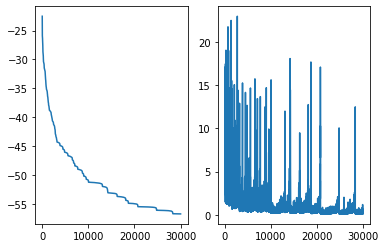

In [11]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(data[:, 0])
axes[1].plot(data[:, 1])

In [15]:
num_cls = 8
sample_per_cls = 10
N = sample_per_cls * num_cls
M = 15
solver = TrustRegions()
manifold = Oblique(M, N)
prob = Problem(manifold=manifold, cost=make_mcr2_loss(num_cls))
with open("loss_RTR.txt", "w") as wf:
    with redirect_stdout(wf):
        Xopt = solver.solve(prob)

In [43]:
data = convert_stdout_to_data("loss_RTR.txt", "RTR")
data.shape

(686, 2)

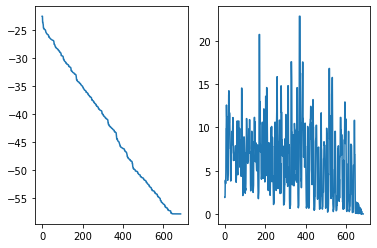

In [44]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(data[:, 0])
axes[1].plot(data[:, 1])

In [45]:
Xopt

array([[ 0.68331649,  0.66848419, -0.52487443, ..., -0.32861924,
        -0.00753128,  0.3494028 ],
       [ 0.20775777,  0.15466693,  0.04080953, ...,  0.41763526,
        -0.03735692, -0.46103015],
       [-0.15480415, -0.13647347,  0.05715734, ..., -0.30342163,
        -0.07500531,  0.29798641],
       ...,
       [ 0.219067  ,  0.19700541, -0.09688356, ..., -0.32330177,
        -0.19793832,  0.27480413],
       [-0.29473895, -0.29304219,  0.24578828, ..., -0.24935005,
        -0.17959335,  0.20220036],
       [ 0.00660382, -0.00332236,  0.03528096, ..., -0.0682316 ,
         0.3738097 ,  0.20837975]])